In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [11]:
# Parameters
I_0 = 5
N = 10
Ris = 0.5
Rsi = 2

In [12]:
def getQMatrix(Rsi, a=0.5, N=10, Ris=0.5):
    """ Create Q matrix with 'a', 'Ris' and 'N' values """
    Q = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        if i != N:
            Q[i, i + 1] = Ris * (N - i) # infective becomes a susceptible again
        if i != 0:
            Q[i, i - 1] = Rsi * i * (N - i) + a # susceptible becomes an infective
        Q[i, i] = - np.sum(Q[i, :])
    return Q

Q = getQMatrix(Rsi, a=0.5, Ris=0.5)

In [13]:
with np.printoptions(precision=2):
    print(Q)

[[ -5.    5.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 18.5 -23.    4.5   0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   32.5 -36.5   4.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   42.5 -46.    3.5   0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   48.5 -51.5   3.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.   50.5 -53.    2.5   0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.   48.5 -50.5   2.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.   42.5 -44.    1.5   0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.   32.5 -33.5   1.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.   18.5 -19.    0.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.5  -0.5]]


<IPython.core.display.Javascript object>


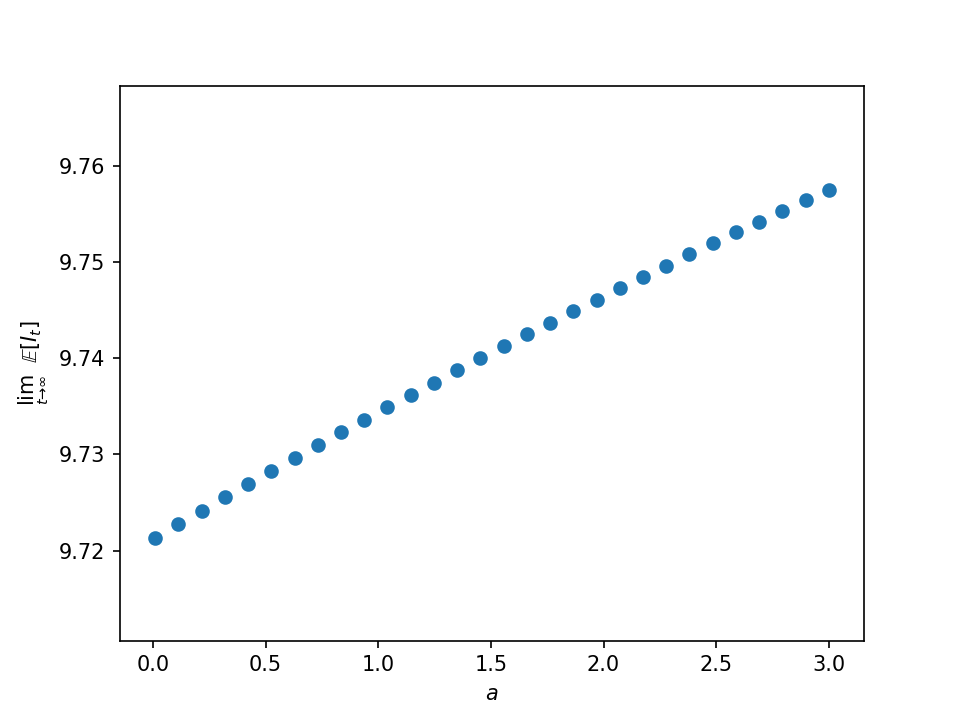

In [20]:
As = np.linspace(0.01, 3, num=30)

infection_rate = []

for A in As:
    Q = getQMatrix(Rsi, a=A, Ris=0.5)
    Qt = np.transpose(Q.copy())
    Qt[-1, :] = np.ones(Q[-1].shape)
    b = np.zeros(Qt.shape[0])
    b[-1] = 1
    pi = np.linalg.solve(Qt, b) # Q^T * pi = b 

    pi_t = pi
    pi = np.transpose(pi[:, np.newaxis])
    
    assert np.allclose(1, sum(pi[0]))
    assert np.allclose(np.matmul(pi, Q), np.zeros(pi.shape))
    
    infection_rate.append(sum((N - index) * p for index, p in enumerate(pi[0], 0)))

plt.figure()
plt.scatter(As, infection_rate)
plt.xlabel(r"$a$")
plt.ylabel(r"$\lim_{t\to\infty} \;\; \mathbb{E} \left[I_{t}\right]$")
plt.savefig("images//q4_c_d")

In [23]:
################## For a = 0.5 ##################
Q = getQMatrix(Rsi, Ris=0.5)
Qt = np.transpose(Q.copy())
Qt[-1, :] = np.ones(Q[-1].shape)
b = np.zeros(Qt.shape[0])
b[-1] = 1
pi = np.linalg.solve(Qt, b) # Q^T * pi = b 

pi_t = pi
pi = np.transpose(pi[:, np.newaxis])

print(pi)

assert np.allclose(1, sum(pi[0]))
assert np.allclose(np.matmul(pi, Q), np.zeros(pi.shape))

print(sum((N - index) * p for index, p in enumerate(pi[0], 0)))

9.727958893196204
